In [1]:
# 기초 전처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

# 캔버스 사이즈 적용
plt.rcParams['figure.figsize'] = (12, 9)

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

# pandas 결과값의 표현 범위 소수점 2자리수로 변경
pd.options.display.float_format = '{:.2f}'.format

# 파일 로드위한 directory 확인 및 현재 경로로 설정
a = os.getcwd()
os.chdir(a)

# 0. 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

print('Data Loading is Done!')

Data Loading is Done!


# 1. EDA & Preprocessing

## Basic Data constructure

In [3]:
print("The shape of Train Data is:", train.shape, "\n")
print("The shape of Test Data is:", test.shape)

The shape of Train Data is: (1460, 81) 

The shape of Test Data is: (1459, 80)


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
print(test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


데이터에 결측치가 있는 것이 발견된다. 피처 엔지니어링을 통해 해당 변수들을 전처리할 필요가 있다.

## 이상치 제거

- 수치형 데이터에서 가장 빈번하게 나타난다.
    - 예측 범위가 넓은 데이터(e.g: 가격)은 데이터의 범위가 클 수록 예측 정확도가 떨어지기 때문에 이상치 확인은 중요하다.
- 이상치 제거의 기준을 단순히 숫자로만 판단하면 안된다.
    - '이상치 = 적절하지 않게 측정된 데이터' 라는 개념으로 인지하는게 중요.

> e.g) 
- OverallQual: Rates the overall material and finish of the house

- OverallCond: Rates the overall condition of the house

와 같은 데이터는 설문 조사자의 주관적 편향이 들어갈 우려가 있는 객관적이지 못한 데이터 이다.
이러한 데이터 또한 이상치로 간주할 수 있을 것이다.

In [8]:
# OverallQual , OverallCond 데이터의 이상치 제거


# OverallQual rate값이 4이하이면서 SalePrice가 20000 이상인 데이터 제거
train.drop( train[(train['OverallQual']<4 ) & ( train['SalePrice']>200000) ].index, inplace=True)
           
# OverallCond rate값이 4이하이면서 SalePrice가 20000 이상인 데이터 제거
train.drop( train[(train['OverallCond']<4 ) & ( train['SalePrice']>200000) ].index, inplace=True)
           
train.reset_index(drop=True, inplace=True)
           
#결과 확인
# 기존 train shape 결과 : The shape of Train Data is: (1460, 81) 
print(train.shape) 

(1458, 81)


## 종속 변수(SalePrice)의 로그화

### SalePrice 시각화

In [9]:
from scipy.stats import norm

In [10]:
(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:" , mu, "\n")
print("The value of sigma after log transformation is:" , sigma)

The value of mu before log transformation is: 180761.24142661178 

The value of sigma after log transformation is: 79270.93617295024


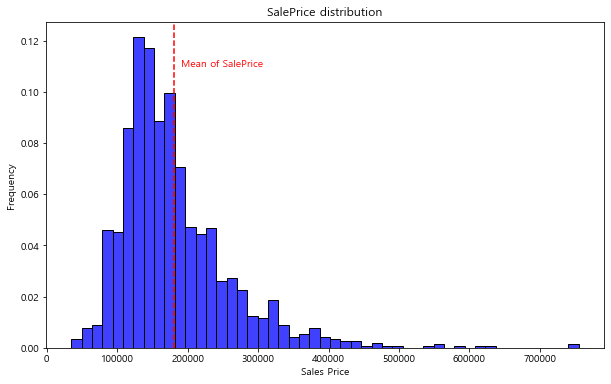

In [11]:
# 캔버스 세팅
fig, ax = plt.subplots(figsize=(10,6))

# Histogram 데이터 입력
sns.histplot(train['SalePrice'], color ='b', stat='probability')

# 축 설정
ax.xaxis.grid(False) 
ax.set(ylabel = 'Frequency')
ax.set(xlabel = 'Sales Price')
ax.set(title = 'SalePrice distribution')

# 그래프출력
plt.axvline(mu, color='r', linestyle = '--')

# 가격 평균선 
plt.text(mu+10000, 0.11, 'Mean of SalePrice', rotation = 0, color = 'r')

fig.show()

- 주택 가격이 정규분포 형태를 이루지 않고 있다.
- 일반적인 선형 회귀는 각 데이터가 '정규분포를 만족한다' 를 전제로 한다.
- 따라서 해당 데이터를 np.log1p() 를 활용해 SalePrice를 로그화 한다.